In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [2]:
path = 'C:/Users/USA/Downloads/archive (3)/'
file_name = "diabetes_prediction_dataset"

#Leo el archivo con pandas
df3 = pd.read_csv(path + file_name + '.csv')
fil3,col3=df3.shape
fil3,col3

(100000, 9)

In [3]:
#Encabezado de mis datos
df3.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
from sklearn.metrics import matthews_corrcoef

In [5]:
X=df3["diabetes"]
y1=df3["hypertension"]
y2=df3["heart_disease"]


# Encoding

In [6]:

def encode(data):
    encoder = data.copy()
    model=LabelEncoder()
    encoder['gender']=model.fit_transform(encoder['gender'])
    encoder['smoking_history']=model.fit_transform(encoder['smoking_history'])
    return encoder
encode(df3)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [7]:
df3=encode(df3)


# Split

In [8]:
X=df3.drop('diabetes',axis=1)
y=df3['diabetes']
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [9]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.20)

model=StandardScaler()
model.fit_transform(x_train)
model.fit_transform(x_test)
print("X TRAIN SHAPE: ",x_train.shape)
print("X TEST SHAPE: ",x_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)



X TRAIN SHAPE:  (80000, 8)
X TEST SHAPE:  (20000, 8)
Y TRAIN SHAPE:  (80000,)
Y TEST SHAPE:  (20000,)


# Predicciones 


In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)
arbol = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
rand=RandomForestClassifier().fit(x_train,y_train)


#Ahora las predicciones 
lrpre=lr.predict(x_test)
knnpre=knn.predict(x_test)
arbolpre=arbol.predict(x_test)
rand=rand.predict(x_test)


C:\Users\USA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
#Ahora algunas métricas 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

a=accuracy_score(y_test,lrpre)
b=accuracy_score(y_test,knnpre)
c=accuracy_score(y_test,arbolpre)
d=accuracy_score(y_test,rand)

print("Usando Accuracy Score las métricas fueron de: ")
print("-Logistic Regresion: {:.4f}".format(a))
print("-KNN: {:.4f}".format(b))
print("-Tree Decision: {:.4f}".format(c))
print("-Random Forest: {:.4f}".format(d))

Usando Accuracy Score las métricas fueron de: 
-Logistic Regresion: 0.9521
-KNN: 0.9546
-Tree Decision: 0.9544
-Random Forest: 0.9708


               Resume for Logistic regression metrics
              precision    recall  f1-score   support

           0      0.963     0.986     0.974     18299
           1      0.796     0.587     0.676      1701

    accuracy                          0.952     20000
   macro avg      0.879     0.786     0.825     20000
weighted avg      0.948     0.952     0.949     20000



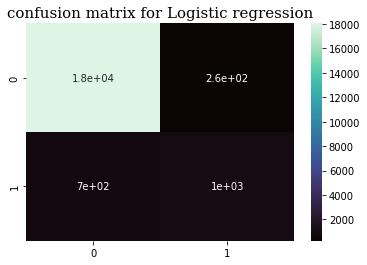

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

cn=confusion_matrix(y_test,lrpre)
sns.heatmap(cn,annot=True,cmap='mako')
plt.title("confusion matrix for Logistic regression",loc="center",fontdict={'family': 'serif'},size=15)

print("               Resume for Logistic regression metrics")
print(metrics.classification_report(y_test, lrpre, digits=3))

               Resume for KNN metrics
              precision    recall  f1-score   support

           0      0.959     0.993     0.976     18299
           1      0.879     0.540     0.669      1701

    accuracy                          0.955     20000
   macro avg      0.919     0.767     0.822     20000
weighted avg      0.952     0.955     0.950     20000



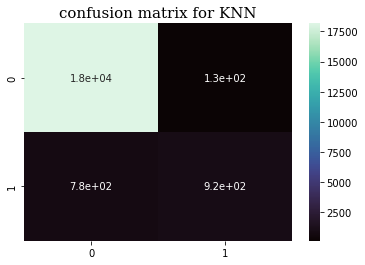

In [13]:
cn1=confusion_matrix(y_test,knnpre)
sns.heatmap(cn1,annot=True,cmap='mako')
plt.title("confusion matrix for KNN",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resume for KNN metrics")
print(metrics.classification_report(y_test, knnpre, digits=3))

               Resumen de Tree decision
              precision    recall  f1-score   support

           0      0.976     0.974     0.975     18299
           1      0.726     0.744     0.735      1701

    accuracy                          0.954     20000
   macro avg      0.851     0.859     0.855     20000
weighted avg      0.955     0.954     0.955     20000



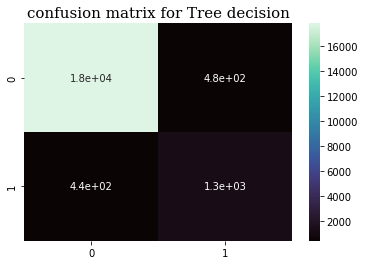

In [14]:
cn2=confusion_matrix(y_test,arbolpre)
sns.heatmap(cn2,annot=True,cmap='mako')
plt.title("confusion matrix for Tree decision",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen de Tree decision")
print(metrics.classification_report(y_test, arbolpre, digits=3))

               Resumen de Tree decision
              precision    recall  f1-score   support

           0      0.972     0.997     0.984     18299
           1      0.955     0.688     0.800      1701

    accuracy                          0.971     20000
   macro avg      0.963     0.843     0.892     20000
weighted avg      0.970     0.971     0.969     20000



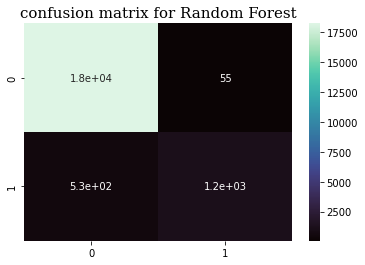

In [15]:
cn3=confusion_matrix(y_test,rand)
sns.heatmap(cn3,annot=True,cmap='mako')
plt.title("confusion matrix for Random Forest",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen de Tree decision")
print(metrics.classification_report(y_test, rand, digits=3))

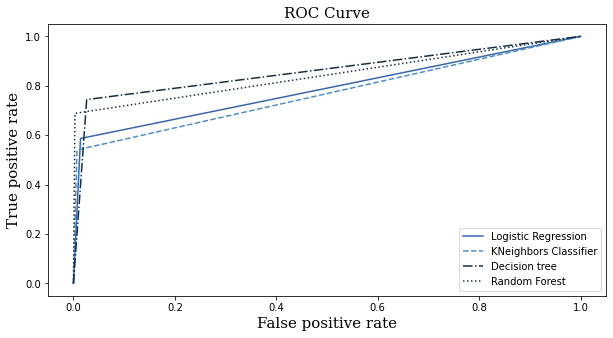

In [16]:
#Ahora, haré la gráfica de ROC auc
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, lrpre, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knnpre, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, arbolpre, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, rand, pos_label=1)

plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, linestyle='-',color='#3766ab', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='#4f8fc6', label='KNeighbors Classifier')
plt.plot(fpr3, tpr3, linestyle="dashdot",color='#152e43', label='Decision tree')
plt.plot(fpr4, tpr4, linestyle=":",color='#152e43', label='Random Forest')
plt.xlabel('False positive rate',fontdict={'family': 'serif'},size=15)
plt.ylabel('True positive rate',fontdict={'family': 'serif'},size=15)
plt.legend()
plt.title("ROC Curve",loc="center",fontdict={'family': 'serif'},size=15)

plt.show()

In [17]:
df3

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


# Ahora quiero probar más los problemas de regresión, usando como variable target el nivel de glucosa en sangre en vez de la variable diabetes

In [18]:
X1=df3.drop('blood_glucose_level',axis=1)
y1=df3['blood_glucose_level']
X1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,0
1,0,54.0,0,0,0,27.32,6.6,0
2,1,28.0,0,0,4,27.32,5.7,0
3,0,36.0,0,0,1,23.45,5.0,0
4,1,76.0,1,1,1,20.14,4.8,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,0
99996,0,2.0,0,0,0,17.37,6.5,0
99997,1,66.0,0,0,3,27.83,5.7,0
99998,0,24.0,0,0,4,35.42,4.0,0


In [19]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=1,test_size=0.20)

model=StandardScaler()
model.fit_transform(x1_train)
model.fit_transform(x1_test)
print("x1 TRAIN SHAPE: ",x1_train.shape)
print("x1 TEST SHAPE: ",x1_test.shape)
print("y1 TRAIN SHAPE: ",y1_train.shape)
print("y1 TEST SHAPE: ",y1_test.shape)



x1 TRAIN SHAPE:  (80000, 8)
x1 TEST SHAPE:  (20000, 8)
y1 TRAIN SHAPE:  (80000,)
y1 TEST SHAPE:  (20000,)


In [20]:
from sklearn.metrics import mean_squared_error

def train_and_test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(mse)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Perceptron
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

arb = DecisionTreeRegressor()
perc=Perceptron()
#svr=SVR(kernel='linear')
randf=RandomForestRegressor(n_estimators=100,
                              max_samples=0.6,
                              max_depth=4)
knn2= KNeighborsRegressor()
print("A continuación los Mean Square error de cada modelo: ")

print("-Tree decision:")

a=train_and_test(arb, x1_train, x1_test, y1_train, y1_test)

print("-Perceptron:")
b=train_and_test(perc, x1_train, x1_test, y1_train, y1_test)
#c=train_and_test(svr, x1_train, x1_test, y1_train, y1_test)
print("-Random Forest:")
d=train_and_test(randf, x1_train, x1_test, y1_train, y1_test)
print("-KNN regression:")
e=train_and_test(knn2, x1_train, x1_test, y1_train, y1_test)
#No usé SVR porque mi computador nunca lo logró correr


A continuación los Mean Square error de cada modelo: 
-Tree decision:
2656.4215177737487
-Perceptron:
4341.65645
-Random Forest:
1358.3640879472925
-KNN regression:
1701.3343
